In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df['Total'] = df.iloc[:,2:-1].sum(axis =1)
# total column to sum the prices of all items

In [7]:
df.groupby(by =[ 'Channel', 'Region']).mean()

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen         Total  
Channel Region                                               
1       1             950.525424  1197.152542  24876.440678  
        2             482.714286  1105.892857  24578.035714  
        3             786.682464  1518.284360  25695.350711  
2       1            8225.277778  1871.944444  45265.333333  
        2            8410.263158  1239.000000  42757.736842  
        3            6899.238095  1826.209524  45178.761905

Channel 2 has higher sales compared to channel 1.Each channel has 3 regions.Sales of 6 items are given.Based on this data, we have to identify optimal number of clusters for seggregating the data.We will use kmeans clustering.

In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,2,3,12669,9656,7561,214,2674,1338,32774
1,2,3,7057,9810,9568,1762,3293,1776,31490
2,2,3,6353,8808,7684,2405,3516,7844,28766
3,1,3,13265,1196,4221,6404,507,1788,25593
4,2,3,22615,5410,7198,3915,1777,5185,40915


In [9]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Total               0
dtype: int64

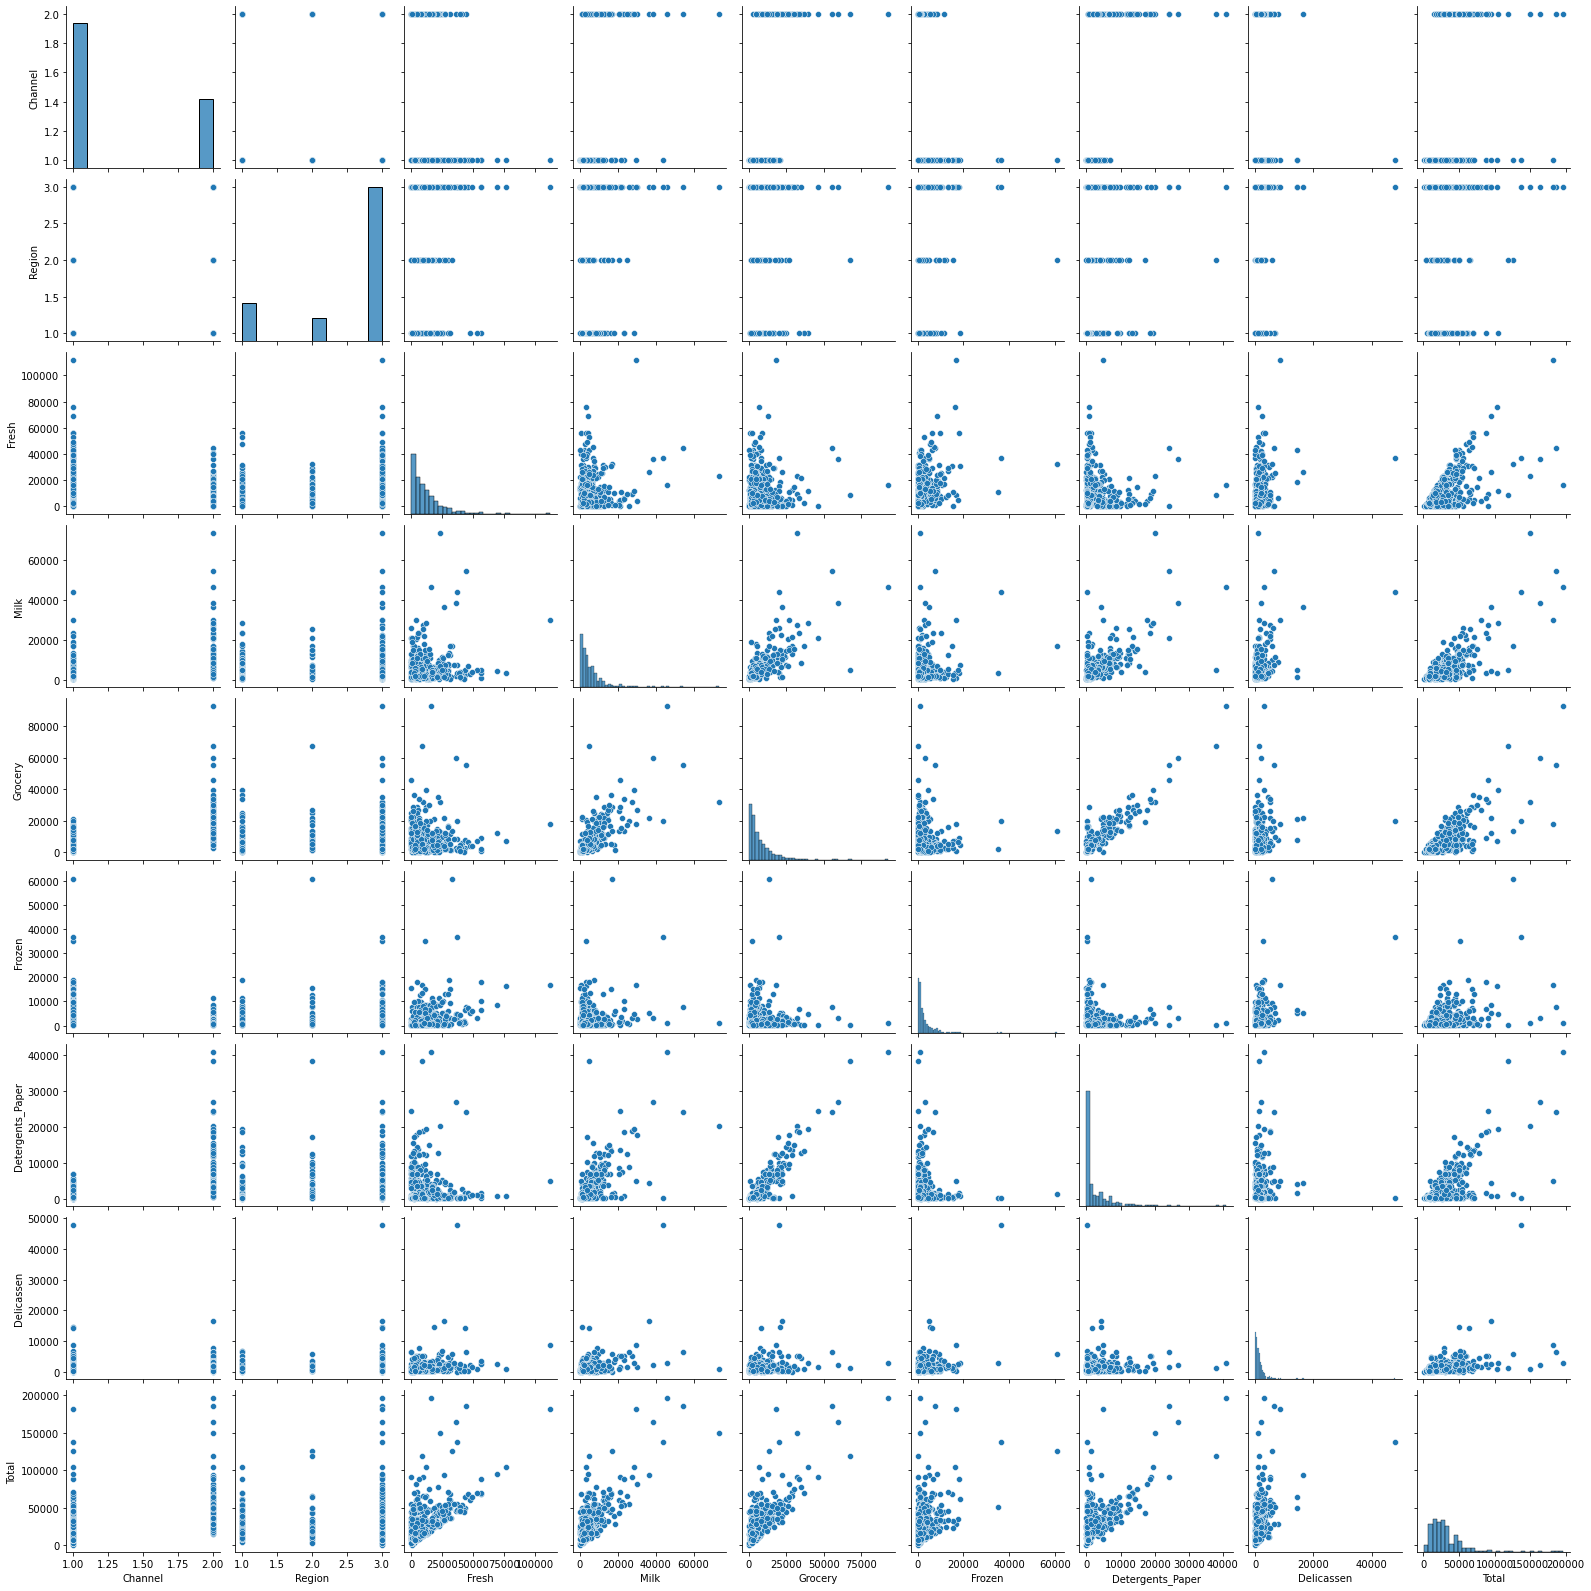

In [10]:
sns.pairplot(df)

In [11]:
#We will not consider  channel and region for segmenting purpose.We will cluster based on the sales of items.
X = df.iloc[:, 2:].values
X

array([[12669,  9656,  7561, ...,  2674,  1338, 32774],
       [ 7057,  9810,  9568, ...,  3293,  1776, 31490],
       [ 6353,  8808,  7684, ...,  3516,  7844, 28766],
       ...,
       [14531, 15488, 30243, ..., 14841,  1867, 75540],
       [10290,  1981,  2232, ...,   168,  2125, 15709],
       [ 2787,  1698,  2510, ...,   477,    52,  7537]], dtype=int64)

## KMeans clustering

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


433616469015.4975
245802973297.70972
157458925008.65723
126106401623.11601
102221837551.66133
87102632954.24344
75403088337.06332
66140814885.299805
56549456432.13346
49804659492.247696
46851665093.35115
42590265933.40033
39860225652.10119
37930338696.70462
34913169136.06569
33243744113.065697
30896113979.530136
29835276249.16008
27621526432.360344
26476441235.674232
24501782225.326313
23277285594.186275
22402353620.023003
20945749257.731487


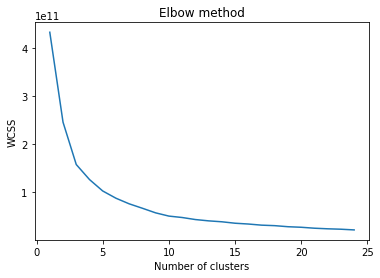

In [12]:
from sklearn.cluster import KMeans
wcss = []
n = 25
for i in range(1,n):
    model = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)
    print(wcss[i-1])
    
plt.plot(range(1,n), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

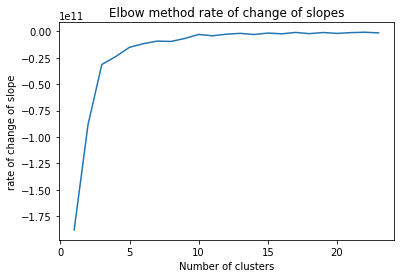

In [13]:
dydx = []
for i in range(0,len(wcss)-1):
    dy = wcss[i+1] - wcss[i]
    dx = 1 #(i+1-i)
    dydx.append(dy/dx)
plt.plot(range(1,n-1), dydx)
plt.title('Elbow method rate of change of slopes')
plt.xlabel('Number of clusters')
plt.ylabel('rate of change of slope')
plt.show()        

In [14]:
# Select the clusters and finalise model
kmeans = KMeans(n_clusters =4 ,init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 3, 2, 0, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 2, 3, 3, 2, 2, 0, 3, 3,
       0, 3, 3, 1, 0, 3, 0, 0, 2, 0, 2, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 3,
       0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 3, 3, 2, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
# for easy plotting,we will add the cluster column to df
df['cluster_kmeans'] = y_kmeans

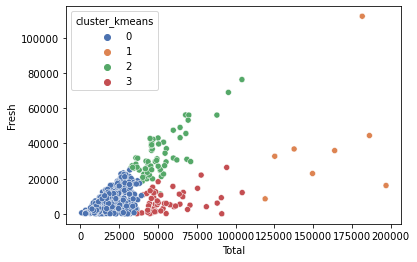

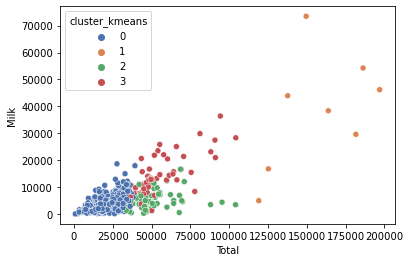

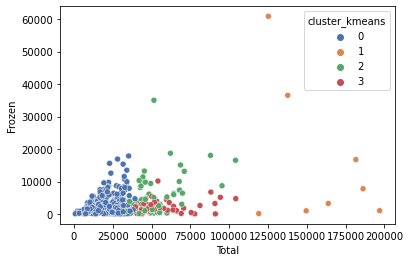

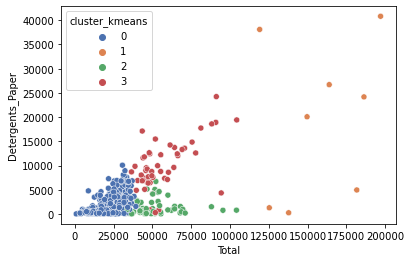

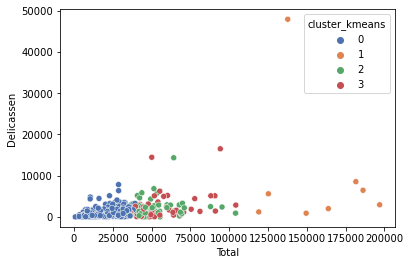

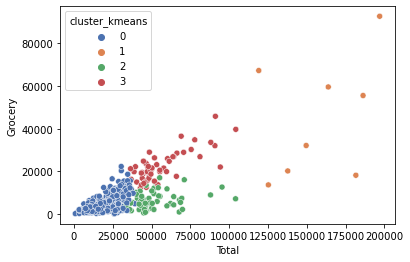

In [16]:
features =['Fresh','Milk','Frozen','Detergents_Paper','Delicassen','Grocery']
l = len(features)
for i in range(len(features)):
    plt.figure(i)
    sns.scatterplot(data = df, x ='Total', y = features[i], palette = 'deep',hue ='cluster_kmeans')

## HC clustering

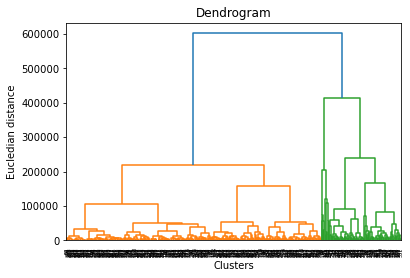

In [17]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method ='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Eucledian distance')
plt.show()

Using dendrogram n_clusters  is 3.(rightmost blue line)

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity ='euclidean', linkage ='ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
df['cluster_hc'] = y_hc

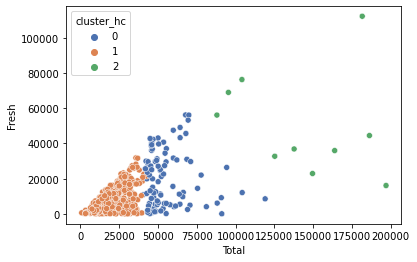

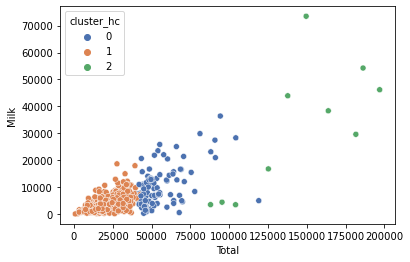

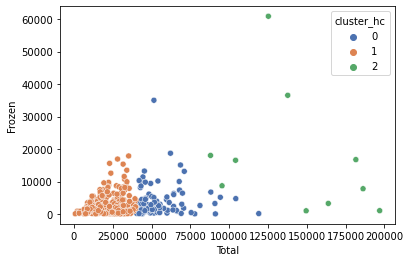

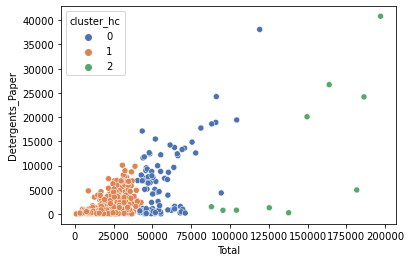

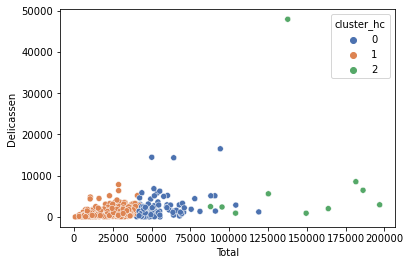

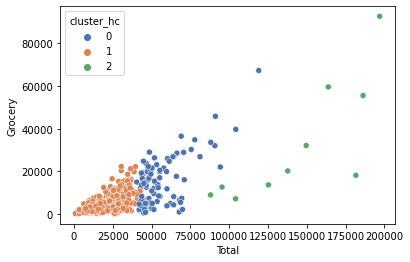

In [20]:
for i in range(len(features)):
    plt.figure(i)
    sns.scatterplot(data = df, x ='Total', y = features[i], palette = 'deep',hue ='cluster_hc')

## Conclusion

</p>We have identified 3 clusters based on HC clustering. It is based on the total sales -High,Medium,Low of the total.
</p>Based on Kmeans clustering, 4 clusters are identified. Seggregation is clearly visible in Total vs Fresh and Total vs Grocery. For other features seggregation is a bit overlapped.